In [84]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import time
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver import Chrome

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import mysql.connector

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from deep_translator import GoogleTranslator
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eefjescheerder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Define variables

In [130]:
bookTitle = ""
grCode = ""
isbn = ""

# Create database connection

In [ ]:
# pull data from db, put in df 
mydb = mysql.connector.connect(
  host="database-1.cxi86tamokep.us-east-1.rds.amazonaws.com",
  user="admin",
  password="Pfm04R&h#B^A",
    database="BookClubDB"
)

mycursor = mydb.cursor()

# Pull information from Google Books API

In [142]:
i = isbn
response = requests.get("https://www.googleapis.com/books/v1/volumes?q=isbn:" + i)    
python_obj = response.json()
image = python_obj['items'][0]["volumeInfo"]["imageLinks"]["thumbnail"]
googleCat = python_obj['items'][0]["volumeInfo"]["categories"][0]
textSnippet = python_obj['items'][0]["searchInfo"]["textSnippet"]
sql = """UPDATE books
     SET textSnippet = %s,
         googleCat = %s,
         image = %s,
     WHERE isbn = %s limit 1;
"""

mycursor.execute(sql, (textSnippet, i))
mydb.commit()



NameError: name 'isbn' is not defined

## Optional

In [ ]:
sql ='''CREATE TABLE summaries(
   isbn CHAR(15),
   grCode CHAR(20),
   title CHAR(50),
   summary VARCHAR(1000)
)'''
    
cursor.execute(sql)

# Scrape webreviews

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)

In [ ]:
url = "https://www.goodreads.com/book/show/" + grCode + "/reviews"
driver.get(url)




delay = 10 # seconds
try:
    myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'ReviewText__content')))
    
    print("Page is ready!")
except TimeoutException:
    print("Loading took too much time!")


In [ ]:
while True:
    try:
        time.sleep(10)
        
        WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable(
                (By.XPATH, "//*[text()='Show more reviews']/ancestor::button[1]")
            )
        ).click()
        print("Tried clicking")
        
    except:
        try:
            driver.execute_script("""
               var l = document.getElementsByClassName("Overlay")[0];
               l.parentNode.removeChild(l);
            """)
        except:
            print("No overlay to delete")

        time.sleep(10)
        
        try:
            WebDriverWait(driver, delay).until(
                EC.element_to_be_clickable(
                    (By.XPATH, "//*[text()='Show more reviews']/ancestor::button[1]")
                )
            ).click()
            print("Tried clicking again")
        except TimeoutException:
            print("Timed out looking for Show more reviews button")
            break;

In [140]:
texts = driver.find_elements(By.CLASS_NAME, "ReviewText__content")

NameError: name 'driver' is not defined

# Create backup

In [ ]:
with open(bookTitle + ".txt", "w") as output:
    output.write(str(texts))

In [ ]:
# my_file = open("TurkishDelight.txt", "r")
# data = my_file.read()
  
# # replacing end of line('/n') with ' ' and
# # splitting the text it further when '.' is seen.
# data_into_list = data.replace('\n', ' ').split("<")

# Clean text

### Remove HTML code and create one composed string

In [ ]:
import re

CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    cleantext = re.sub('Show more', ' ', cleantext)
    cleantext = re.sub(r'(\w)\.(\w)', '\\1. \\2', cleantext)
return cleantext

In [ ]:
reviews = '' 

for i in texts:
    text = cleanhtml(i.get_attribute('innerHTML'))
    text = text + " "
    reviews += str(text)

In [ ]:
# New backup, cleaned text
with open(bookTitle + ".txt", "w") as output:
    output.write(str(reviews))

### Translate all reviews into English

In [ ]:
translatedReviews = ''
x = nltk.tokenize.sent_tokenize(reviews)
for sentence in x:
    translated = GoogleTranslator(source='auto', target='english').translate(sentence)
    translatedReviews += str(translated)

In [141]:
# backup translated reviews
with open(bookTitle. + "Translated.txt", "w") as output:
    output.write(str(translatedReviews))

SyntaxError: invalid syntax (3891086153.py, line 2)

### Tokenize

In [144]:
# Download stop words
# nltk.download('stopwords')

# Remove stop words and punctuations
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]


# Convert text into a list of sentences
sentences = sent_tokenize(text)

In [ ]:
# backup 
with open(bookTitle + "Tokenized.txt", "w") as output:
    output.write(str(sentences))

# Create summary

In [135]:
# Calculate sentence scores
sentence_scores = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in words:
            if sentence not in sentence_scores:
                sentence_scores[sentence] = 0
            sentence_scores[sentence] += 1/len(sentences)

In [136]:
# Select top sentences
summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:2]
summary = ' '.join(summary_sentences) 

In [149]:
# Print the original text
# print("Original Text:\n", text)

# Print the summary
print("\nSummary:\n", summary)

# Print the length of both
print("\nLength of Original Text:", len(text))
print("Length of Summary:", len(summary))


Summary:
 la parte finale è molto d'effetto, il plot twist su Ava è ben gestito che se forse era un po' prevedibile (ma l'autrice è brava a distrarre il lettore dagli indizi che lei stessa ha seminato, quindi il lettore, ben immerso nella mente di Samantha, arriva a quel punto e facilmente ne rimane spiazzato) e è ben gestita l'opposizione tra la caduta delle Bunny e il trionfo di Samantha — le egocentriche, chiuse Bunny sono distrutte come gruppo e persone dalla più perfetta creazione partorita dalle loro manie di grandezza, quella creazione che in un primo momento era sembrata un sogno fatto realtà, la coronazione di un progetto sudato; Samantha, specularmente, vince contro tutto e tutti (compresa sé stessa) rifiutando il sogno ad occhi aperti che ha coltivato per mesi e distruggendo la creazione perfetta di cui lei è la principale artefice.Rimane irrisolto il grande mistero di come e perché queste ragazze possano plasmare la materia e imfonderci una sorta di anima rudimentale; ok l

### Store summary in database 

In [166]:
sql = """INSERT INTO summaries
         SET isbn = %s,
             grCode = %s,
             title = %s,
             summary = %s
"""
val = (isbn, grCode, title, summary)
mydb.commit()

''

# Create wordcloud

In [150]:
sentences

['oooh, goodreads choice awards semifinalist for BEST HORROR 2019!',
 'what will happen?this book is straight-up bonkers.',
 'seeing this was set “at an elite new england university” with an exclusive clique at its center and seeing it compared to Heathers, i went into it expecting a Megan Abbott-y/The Secret History-y type of deal; full of those dark and toxic currents that define adolescent girlhood, where affection shifts into power struggle at the drop of a hat, but also featuring a bunch of soulless smarty-pants big on ritualistic gatherings and down for some light murder.',
 'yes and pleasethis… is not that.',
 'which is not to say it’s bad AT ALL, it’s just not what i thought i was getting into.',
 'it is ALSO not, although this is frequently true of other books, that it is being misrepresented by overzealous marketing.',
 'you see, it is also compared to The Vegetarian, which i have not read, but now that i’ve looked into that book more, if i HAD read it, i probably would have 

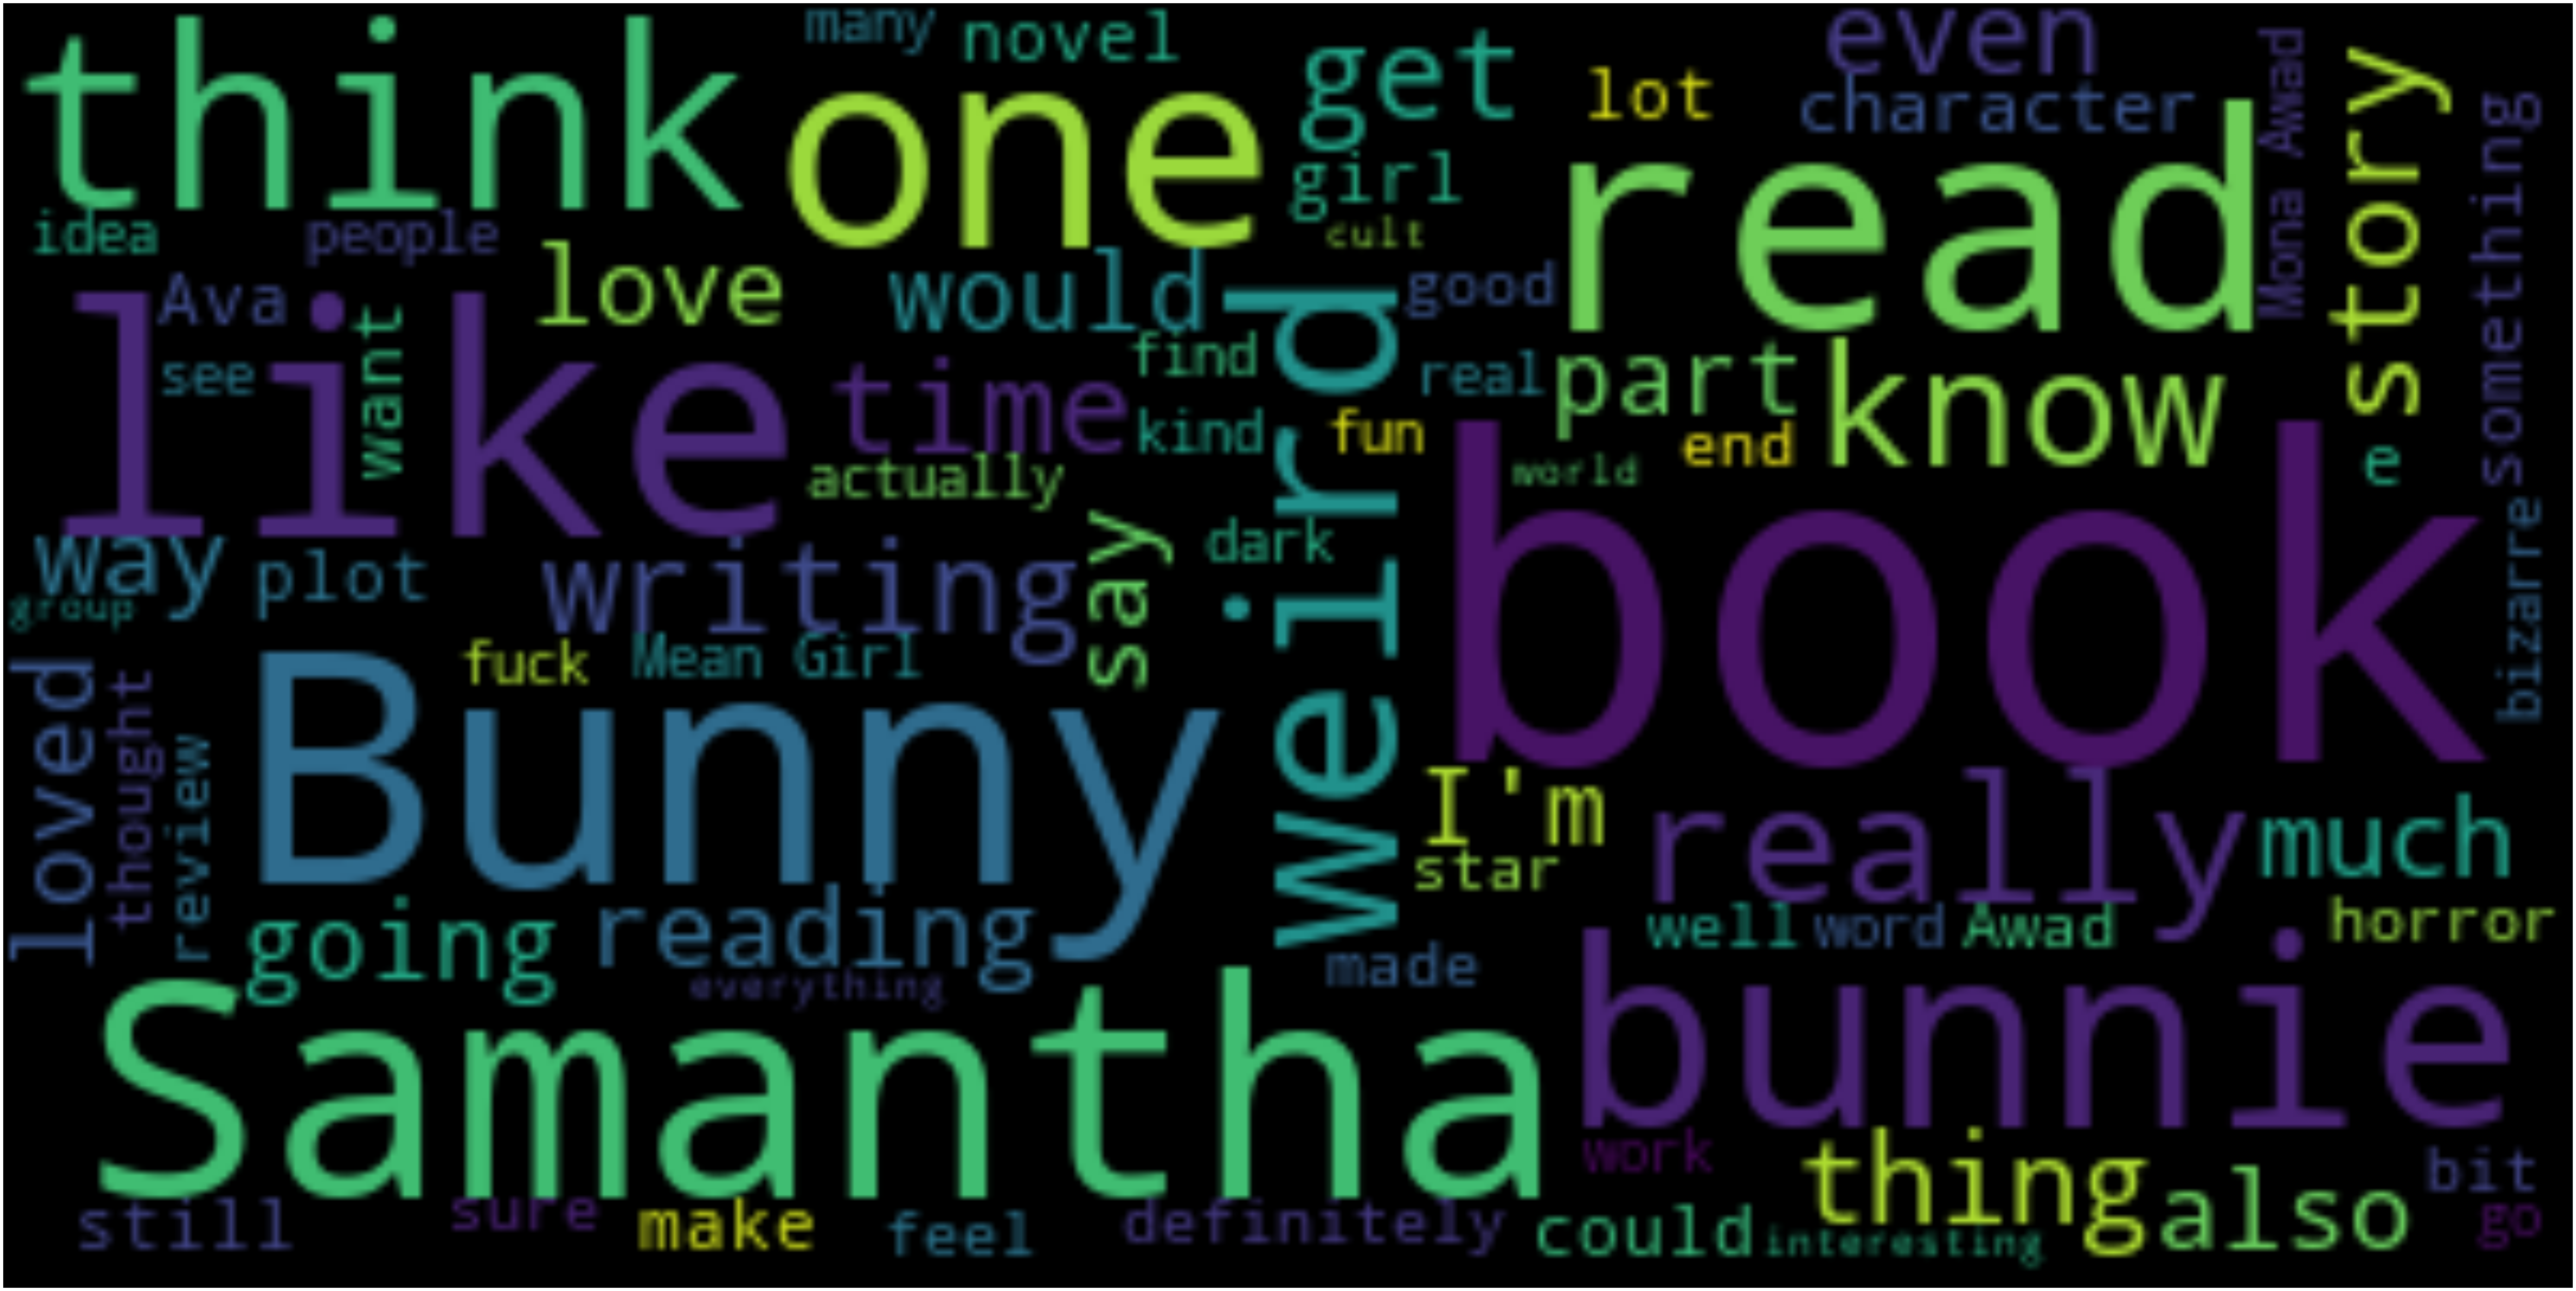

In [165]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color ='rgba(0,0,0,1)', max_words=75, stopwords=stop_words, width = 400, height = 200).generate(". ".join(sentences))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

#save image
wordcloud.to_file(bookTitle + ".png")